In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy
from ipywidgets import interact
import ipywidgets as widgets

### Zadanie 1.
W mieście sprzedawane są domy i klimatyzatory - wiadomo, że są to dobra uzupełniające się, więc ich sprzedaż będzie ze sobą powiązana. Liczba sprzedawanych domów ($x(t)$) zmienia się proporcjonalnie do liczby domów, których jeszcze nie sprzedano (łącznie dostępnych jest $h$ domów). Liczba sprzedanych klimatyzatorów ($y(t)$) zmienia się proporcjonalnie do liczby sprzedanych dowów, które jeszcze nie mają klimatyzatora. Wiadomo, że dom sprzedaje się średnio w $a$ dni, a klimatyzator średnio w $b$ dni. Chcemy dowiedzieć jak wygląda sprzedaż tych dwóch dóbr.

Tworzymy układ równań:
$$x'(t) = \frac{1}{a}(h-x(t)), \quad x(0) = x_0,$$
$$y'(t) = \frac{1}{b}(x(t)-y(t)), \quad y(0) = y_0.$$

In [2]:
sympy.init_printing()

In [3]:
def zadanie1(a, b, h, x0, y0):
    x = sympy.Function('x')
    y = sympy.Function('y')
    t = sympy.symbols('t')
    ivp_sol = sympy.dsolve([x(t).diff(t) - (h - x(t))/a, y(t).diff(t) - (x(t) - y(t))/b], ics = {x(0): x0, y(0): y0})
    tt = np.linspace(0, 50, 200)
    fun = sympy.lambdify(t, ivp_sol[0].rhs, 'numpy')
    fun2 = sympy.lambdify(t, ivp_sol[1].rhs, 'numpy')
    plt.plot(tt, fun2(tt), label = 'Sprzedane klimatyzatory')
    plt.plot(tt, fun(tt), label = 'Sprzedane domy')
    plt.legend()
    plt.xlabel('Dzien')
    plt.ylabel('Liczba')
    plt.title('Wykres zaleznosci sprzedanych domow i klimatyzatorow')
    plt.show()
    
interact(zadanie1, a=widgets.IntSlider(min=1, max=100, step=1, value=7, description="a"),
                   b=widgets.IntSlider(min=1, max=100, step=1, value=10, description="b"),
                   h=widgets.IntSlider(min=100, max=1000, step=10, value=500, description="h"),
                   x0=widgets.IntSlider(min=1, max=100, step=1, value=8, description="x0"),
                   y0=widgets.IntSlider(min=1, max=100, step=1, value=14, description="y0"));

interactive(children=(IntSlider(value=7, description='a', min=1), IntSlider(value=10, description='b', min=1),…

# Zadanie 2

### Zadanie 2.
Na wykładzie i ćwiczeniach omawialiśmy układ równań Lotki-Volterry (czyli model drapieżnik-ofiara):
$$x' = ax - bxy, \quad y' = dxy - cy,$$
gdzie $x$ to liczność populacji ofiary, $y$ to liczność populacji drapieżnika. Stwórz pole kierunków i sprawdź, czy możliwe jest symboliczne wyznaczenie rozwiązania tego problemu dla następujących danych:
$$a = 0.4, \quad b = 0.002, \quad c = 0.7, \quad d = 0.001, \quad x(0) = 600, \quad y(0) = 400.$$


In [30]:
x = sympy.Function('x')
y = sympy.Function('y')

t, a, b, c, d = sympy.symbols('t, a, b, c, d')

ode_sol = sympy.dsolve([x(t).diff(t) - a * x(t) + b * x(t) * y(t), y(t).diff(t) - d * x(t) * y(t) + c * y(t)],
                      ics = {x(0): 10000, y(0): 1000}, n = 5)
ode_sol


KeyboardInterrupt: 

### Nie wykonuje się w rozsądnym czasie :(

In [21]:
x = sympy.Function('x')
y = sympy.Function('y')
a = 0.4
b = 0.002
c = 0.7
d = 0.001
x0 = 600
y0 = 400

ode_sol = sympy.dsolve([x(t).diff(t) - a*x(t) + b*x(t)*y(t), y(t).diff(t) - d*x(t) * y(t) + c * y(t)],
                      ics={x(0): x0, y(0): y0})

ValueError: Couldn't solve for initial conditions

### Zadanie 3.
Rozwiąż numerycznie układ równań Lotki-Volterry z Zadanie 2, następnie stwórz wykres rozwiązań (zależności $x(t)$ i $y(t)$), a także nanieś na pole kierunków trajektorię rozwiązania.

In [31]:
def eq(t, z, a, b, c, d):
    x, y = z
    z0 = a*x - b*x*y
    z1 = d*x*y - c*y
    return [z0, z1]

In [41]:
a = 0.4
b = 0.002
c = 0.7
d = 0.001
t = np.linspace(0, 100, 300)
xy0 =[600, 400] 
ode_sol = integrate.solve_ivp(eq, [0, 100], xy0, args=(a, b, c, d), dense_output=True)

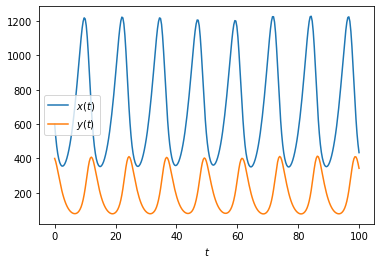

In [42]:
plt.plot(t, ode_sol.sol(t).T)
plt.xlabel('$t$')
plt.legend(['$x(t)$', '$y(t)$'])
plt.show()

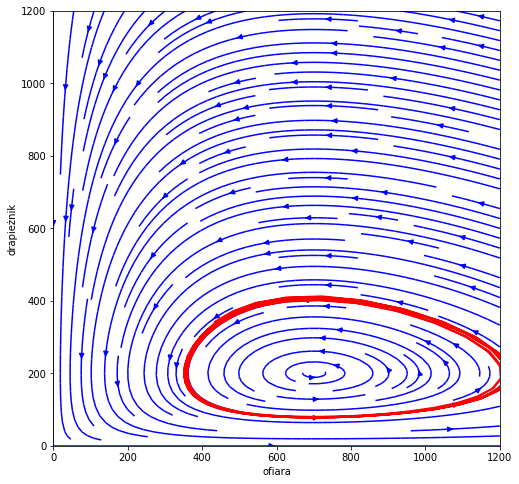

In [48]:
_, axes = plt.subplots(figsize=(8,8))

X, Y = np.meshgrid(np.linspace(0, 1200, 40), np.linspace(0, 1200, 40))
U, V = eq(_, (X, Y), a, b, c, d)

axes.streamplot(X, Y, U, V, density=1.5, color='blue')
axes.plot(ode_sol.sol(t)[0], ode_sol.sol(t)[1], 'r')
axes.set_xlabel('ofiara')
axes.set_ylabel('drapieżnik')
axes.set_xlim(0, 1200)
axes.set_ylim(0, 1200)
plt.show()

In [47]:
ode_sol.sol(t)

array([[ 600.        ,  527.77936591,  471.03209378,  428.22020056,
         397.24068583,  375.84383679,  362.60357081,  356.11731494,
         355.36805207,  359.74347166,  369.03469156,  383.00706065,
         401.39456558,  424.17218661,  451.363382  ,  483.04008798,
         519.2856808 ,  559.97819339,  605.53815617,  656.23117396,
         711.97589284,  772.34400015,  836.56022451,  903.50233577,
         971.70114507, 1039.32843599, 1103.17727786, 1158.03347562,
        1198.28502889, 1218.08138678, 1211.3375557 , 1173.51384842,
        1105.84746309, 1013.83458712,  906.7972367 ,  797.30997083,
         694.73008756,  604.26021671,  529.26275183,  471.13363199,
         427.49507091,  395.75991509,  373.96606843,  360.39939471,
         353.67109935,  352.90551318,  357.41323675,  366.70374097,
         380.49036547,  398.69031863,  421.29391022,  448.30079609,
         479.84236725,  516.03338082,  556.97106633,  602.7351257 ,
         653.38773324,  708.53280767,  768.13254